In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

In [5]:
# Load a sample image (e.g., the astronaut)
original_image_color = data.astronaut()
# Convert to grayscale
original_image = rgb2gray(original_image_color)

# Normalize the image data (pixels from 0-255 to 0-1)
original_image = original_image / 255.0

print(f"Original image shape: {original_image.shape}")

Original image shape: (512, 512)


In [6]:
# Set the number of components to keep.
# This value is a trade-off between compression and quality.
# A good value is often a fraction of the original dimensions (e.g., 512 -> 64, 128)
n_components = 64

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA on the image and transform the data to its principal components
transformed_data = pca.fit_transform(original_image)

# Reconstruct the image from the transformed data
reconstructed_image = pca.inverse_transform(transformed_data)

print(f"Transformed data shape: {transformed_data.shape}")
print(f"Reconstructed image shape: {reconstructed_image.shape}")

Transformed data shape: (512, 64)
Reconstructed image shape: (512, 512)


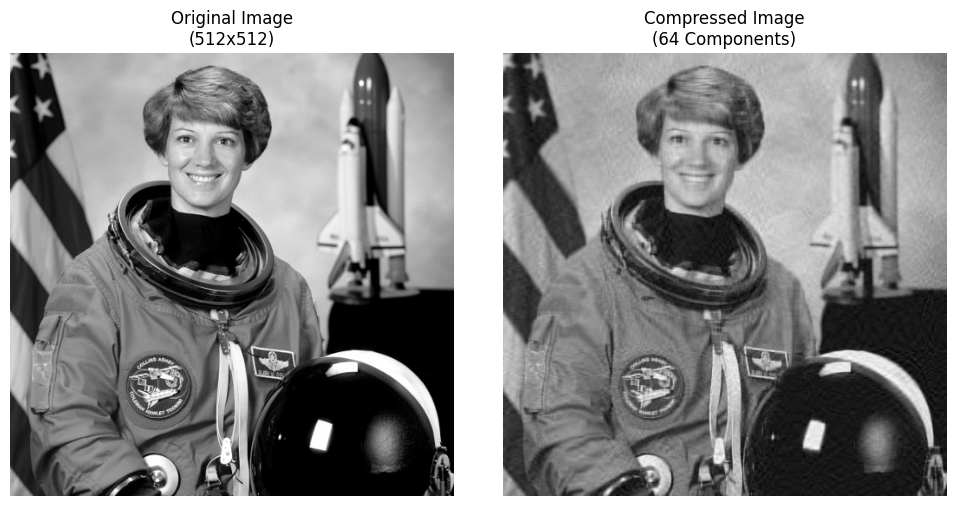

Compression Ratio: 8.00:1


In [7]:
# Display the original and reconstructed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title(f'Original Image\n({original_image.shape[0]}x{original_image.shape[1]})')
axes[0].axis('off')

# Reconstructed Image
axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title(f'Compressed Image\n({n_components} Components)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Calculate the compression ratio
original_size = original_image.shape[0] * original_image.shape[1]
compressed_size = transformed_data.shape[0] * transformed_data.shape[1]
print(f"Compression Ratio: {original_size / compressed_size:.2f}:1")